(Estimación de la velocidad de rotación terrestre) En un sistema rotante se debe corregir la segunda ley de Newton dado que es un sistema de referencia no inercial. En el caso de la rotación terrestre, es suficiente incluir la aceleración de coriolis para describir el efecto de la rotación (dado que la aceleración centrifuga es despreciable ($a_{ce} \omega^2$)). Se desea estimar la velocidad angular de rotación teniendo en cuenta mediciones realizadas en varias latitudes $\lambda$ del planeta y la incertidumbre experimental de la gravedad $g =9.81^{+1}_1\hat{k}$; que corresponde con un error relativo del 10%. Las ecuaciones de movimiento quedan expresadas como:

In [6]:
import numpy as np
import pandas as pd
import scipy.optimize as spo
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:
file = 'Rotacion.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'

In [14]:
data = pd.read_csv(url,sep=",",engine='python')
angle30 = data[data.angle==30]
angle30

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


In [23]:
sigmay=np.array(data.sigmay,np.float64)
sigmay

array([0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0015])

In [41]:
h_values = np.array(data.h,np.float64)
h_values

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,  10.,
        20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,  10.,  20.,
        30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,  10.,  20.,  30.,
        40.,  50.,  60.,  70.,  80.,  90., 100.,  10.,  20.,  30.,  40.,
        50.,  60.,  70.,  80.,  90., 100.,  10.,  20.,  30.,  40.,  50.,
        60.,  70.,  80.,  90., 100.])

In [42]:
y_values = np.array(data.y,np.float64)

In [43]:
def Model(p,h,latitude,g):
    return (2*np.sqrt(2)/3)*p*np.cos(latitude*np.pi/180)*np.sqrt(h**3/g)

In [44]:
def Chi_2(p,h,y,sigmay,angle,g):
    return np.sum(((y-Model(p[0],h,angle,g))**2/sigmay**2))

In [49]:
minimize_options = {'disp': True}
g0=9.81
p0=[0.]
args=(angle30.h,angle30.y,angle30.sigmay,angle30.angle,g0)
Min_=spo.minimize(Chi_2,p0,args=args)
Omega_30=Min_.x

In [50]:
print(Omega_30)

[7.24399826e-05]


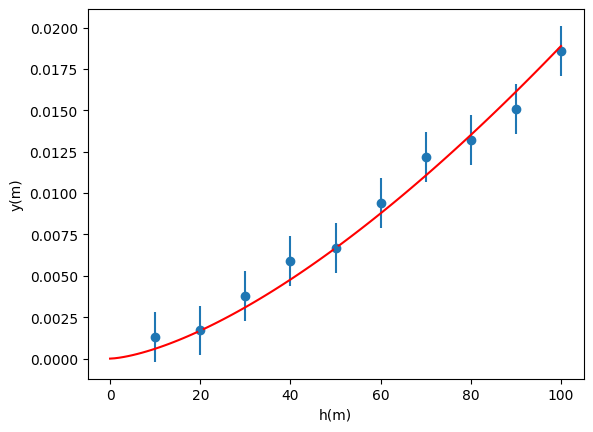

In [51]:
fig1=plt.figure()
ax=fig1.add_subplot()
ax.scatter(angle30.h,angle30.y)
ax.errorbar(angle30.h,angle30.y,yerr=angle30.sigmay,fmt=".")
ax.set_xlabel("h(m)")
ax.set_ylabel("y(m)")
x_=np.linspace(0,100,100)
y_=Model(Omega_30,x_,30.,9.81)

plt.plot(x_,y_,color="r")

Propagación de la incertidumbre de la aceleración de la gravedad:

In [52]:
N=300
Gravedad=np.zeros(N)
Omega=np.zeros(N)
y=angle30.y

In [54]:
for i in tqdm(range(N)):
    Gravedad[i]=9.81 + np.random.normal(loc=0,scale=1)
    
    yi=y + np.random.normal( loc=0, scale=sigmay[0], size=len(y) )
    
    Omega[i]=spo.minimize(Chi_2,p0,args=(angle30.h,yi,angle30.sigmay,angle30.angle,Gravedad[i])).x

100%|██████████| 300/300 [01:02<00:00,  4.81it/s]


In [55]:
H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(30,30))

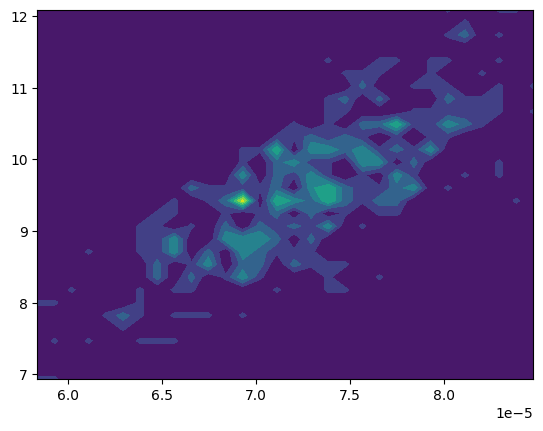

In [56]:
fig2=plt.figure()
ax2=fig2.add_subplot()
ax2.contourf(binsx[0:-1],binsy[0:-1],H2)

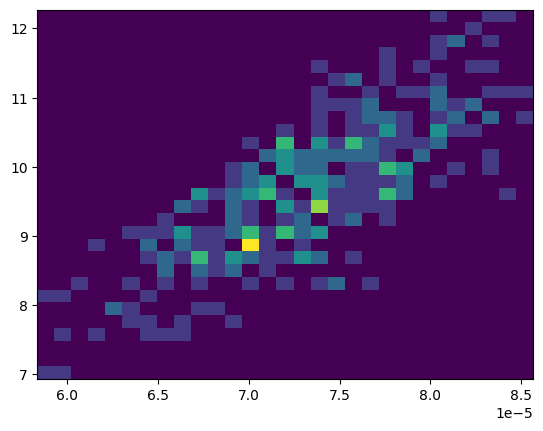

In [57]:
gridy = np.linspace(min(Gravedad),max(Gravedad),30)
gridx = np.linspace(min(Omega),max(Omega),30)

H2, binsx, binsy = np.histogram2d(Omega,Gravedad,bins=(gridx,gridy))
plt.imshow(H2,interpolation='nearest', origin='lower', extent=[binsx[0],binsx[-1] , binsy[0], binsy[-1]],aspect="auto")
plt.show()

In [58]:
Mean_g = np.sum(Gravedad)/300
Mean_omega = np.sum(Omega)/300

Var_g = ((Gravedad - Mean_g)**2).sum()/300
Var_omega = ((Omega - Mean_omega)**2).sum()/300

Covar_gw = ((Gravedad - Mean_g)*(Omega - Mean_omega)).sum()/300

r = Covar_gw/((np.sqrt(Var_g))*(np.sqrt(Var_omega)))
r

0.77753060961358

Las variables si estan correlacionadas

In [33]:
H1 = np.sum(H2,axis=1)

cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

Omega_sort=np.sort(Omega)

omega_best=Omega_sort[int(cs[ii])]
CL=[Omega_sort[int(cs[ij])],Omega_sort[int(cs[ji])]]

In [34]:
print(omega_best,CL)

7.230750175071443e-05 [6.323139476749276e-05, 8.210824730788989e-05]


In [35]:
def Resample(Data_):
    
    N=300
    Gravedad=np.zeros(N)
    Omega=np.zeros(N)
    y=Data_.y

    for i in tqdm(range(N)):
        Gravedad[i]=9.81 + np.random.normal(loc=0,scale=1)
        
        yi=y + np.random.normal( loc=0, scale=sigmay[0], size=len(y) )
        
        Omega[i]=spo.minimize(Chi_2,p0,args=(Data_.h,yi,Data_.sigmay,Data_.angle,Gravedad[i])).x
        
    H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(300,300))

    H1 = np.sum(H2,axis=1)

    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )

    Omega_sort=np.sort(Omega)

    omega_best=Omega_sort[int(cs[ii])]
    CL=[Omega_sort[int(cs[ij])],Omega_sort[int(cs[ji])]]
    sigma=(CL[1]-CL[0])/2
    
    return omega_best,CL,sigma/omega_best

In [37]:
Omegas=np.zeros((7,3))

for i in range(1,7):
    Angle=i*10
    w=Resample(data.query("angle==@Angle"))
    Omegas[i-1,0]=Angle
    Omegas[i-1,1]=w[0]*1e5
    Omegas[i-1,2]=w[2]

Omegas[6,0]=70
wc=Resample(data)
Omegas[6,1]=wc[0]*1e5
Omegas[6,2]=wc[2]

Omegas

100%|██████████| 300/300 [01:02<00:00,  4.83it/s]


array([[10.        ,  7.08323638,  0.11754825],
       [20.        ,  7.13804816,  0.14064025],
       [30.        ,  7.23991691,  0.15105558],
       [40.        ,  7.74914417,  0.12938082],
       [50.        ,  7.08430665,  0.1582062 ],
       [60.        ,  7.48550768,  0.16796417],
       [70.        ,  7.08793645,  0.09572003]])

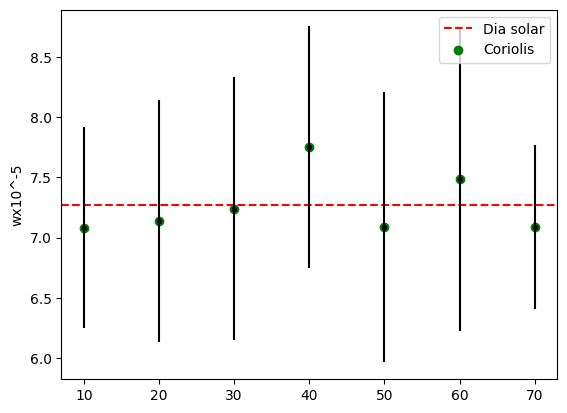

In [59]:
fig3=plt.figure()
ax3=fig3.add_subplot()
ax3.axhline(y=7.27,ls="--",color="r",label="Dia solar")
ax3.errorbar(Omegas[:,0],Omegas[:,1],yerr=Omegas[:,2]*Omegas[:,1],fmt=".",color="k")
ax3.scatter(Omegas[:,0],Omegas[:,1],color="g",label="Coriolis")
ax3.set_ylabel("wx10^-5")
ax3.legend()
